# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제

# 차원 축소를 왜 하는 것인가?

우리가 차원 축소를 하는 이유는 크게 3가지로 니눌 수 있다.

1. 차원의 수가 너무 많아 학습 속도가 느릴 때(차원의 많으면 많을수록 모델의 학습속도는 차원의 수의 배가 됨)
2. 차원의 수가 너무 많아 데이터 간의 거리가 매우 멀어져 과적합이 생길 때
3. 차원의 수가 너무 많아 차원들 간의 관계가 선형 종속일때 다중공선성일 발생하여 과적합이 발생할 때

위와 같은 이유를 해결하고자 차원 축소를 진행하며 위와 같이 차원이 너무 많아 발생하는 문제들을 차원의 저주라고 한다.

이론적으로 차원의 저주를 해결하는 방법은 훈련 세트의 크기를 키우는 방법이지만 현실적으로 더 많은 훈련 세트를 확보하는 것은 많은 시간과 비용이 필요하기 때문에 차원 축소 방법을 사용하는 것이 더 효과적이다.

차원을 축소한다면 아래와 같은 3가지 효과를 얻을 수 있다.

1. 차원의 수를 줄임으로써 모델의 학습 속도를 높일 수 있다.
2. 차원의 수를 줄임으로써 희소했던 데이터 간의 밀도를 높여 과적합을 해결할 수 있다.
3. 차원 축소 자체가 차원을 선형 독립의 관계로 만들어 주기 때문에 다중공선성을 해결해 과적합을 해소할 수 있다.

일반적으로 차원을 축소한다면 축소된 차원 만큼의 데이터에 대한 설명력을 잃기 때문에 모델의 성능은 하락한다. 하지만 그럼에도 우리가 차원 축소를 하는 이유는 모델의 학습 속도를 빠르게 함으로써 빠른 피드백이 가능하게 위함, 희소한 데이터 셋의 경우 희소성을 감소시킴으로써 모델의 일반화를 높이기 위함, 다중공선성을 해결함으로써 일반화를 높이기 위함이다. 또한 의사결정권자에게 나의 판단을 설명하기 위해서는 데이터를 가지고 시각화를 진행하는 것이 필수이다. 고차원의 데이터를 2 ~ 3차원의 데이터로 축소함으로써 우리는 데이터를 시각화하여 의사결정권자를 쉽게 설득시킬 수 있을 것이다. 뿐만아니라 데이터를 시각화할 수 있다는 것은 데이터의 패턴 또한 쉽게 찾을 수 있게 만들어줘 더 나은 판단을 내릴 수 있게 해준다.

따라서 차원축소 기법은 분석자의 상황 및 데이터의 종류에 따라서 알맞게 시행되어야 할 것이다.

# 차원 축소 방법

차원을 축소하는 방법은 PCA(Principal Component Analysis), SVD(Singular Value Decomposition), LDA(Linear DIscriminant Analysis), T-SNE(t-distributed Stochastic Neighbor Embedding) 등이 있으며 이 밖에도 다양한 차원 축소 방법이 존재한다.

이번 장에서는 다양한 차원 축소 방법 중 PCA를 직접 만들어보고 만든 PCA와 sklearn의 PCA를 비교하고 sklearn의 PCA의 차원축소 방법과 동일한 SVD를 실습하고 그 밖에 LDA, T-SNE 등을 실습할 예정이다.

## 직접 구현한 PCA

가장 대표적인 차원축소 방법인 PCA, 즉 주성분 분석은 입력 데이터의 공분산 행렬을 고유벡터와 고유값으로 분해하여 분해된 고유 값이 큰 순으로 고유벡터를 추출해 차원을 축소하는 방식이다.

PCA는 크게 4가지 순서를 통해서 진행된다.

1. 입력 데이터 세트의 공분산 행렬을 생성한다.
2. 공분산 행렬의 고유벡터와 고유값을 계산한다.
3. 고유값이 가장 큰 순으로 K개 만큼 고유벡터를 추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

위 순으로 작동되는 함수를 만들어 PCA를 직접 구현했다.


In [ ]:
import pandas as pd
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings(action='ignore')

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# 추출한 고유벡터와 원데이터를 서로 내적하여 추출할 새로운 데이터를 만드는 함수
def new_coordinates(X, eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new, [X.dot(eigenvectors.T[i])]), axis=0)
    return new.T

In [ ]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X, number):
    # PCA의 경우 분산이 큰쪽으로 차원을 축소하는 경향이 존재하기 때문에
    # 표준화를 통해서 모든 차원의 분산을 1로 정규화시켜줘야 한다.
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X) #sclaing 후 데이터

    features = X_std.T

    # 공분산 행렬을 구한다.
    cov_matrix = np.cov(features)

    eigenvalues_and_eigenvectors = lin.eig(cov_matrix)
    
    # Eigenvalue
    eigenvalues = eigenvalues_and_eigenvectors[0]
    
    # Eigenvector
    eigenvectors = eigenvalues_and_eigenvectors[1]

    # 추출한 데이터
    new_coordinate = new_coordinates(X_std, eigenvectors)

    # 고유 값이 큰 순으로 인덱스를 반환
    idx = eigenvalues.argsort()[::-1].tolist()

    if number > len(idx):
        print(f'선택된 주성분의 요소가 Eigenvalue의 개수보다 많습니다. {len(idx)}이하로 다시 설정해주세요')
        return

    for i in range(number):
        if i == 0:
            new = [new_coordinate[:, idx[i]]]
        else:
            new = np.concatenate((new, [new_coordinate[:, idx[i]]]), axis=0)

    return new.T #새로운 축으로 변환되어 나타난 데이터 return

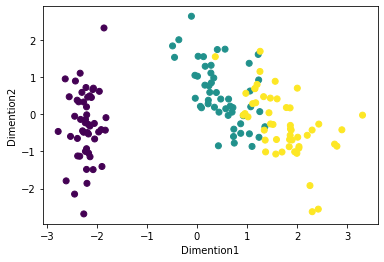

In [ ]:
transformed = MYPCA(X, 2)

dimention1 = transformed[:,0]
dimention2 = transformed[:,1]
plt.scatter(dimention1, dimention2, c=y)
plt.xlabel('Dimention1')
plt.ylabel('Dimention2')

plt.show()

## PCA

아래는 sklearn의 PCA 패키지를 통해서 차원을 축소한 것이다.

직접만든 PCA와 비교했을 때 차원 2의 방향이 서로 반대로 되어있는 것을 확인할 수 있다.

이는 sklearn의 PCA는 고유값 분해(eigenvalue-decomposition)가 아닌 특이값 분해(SVD, Singular Value Decomposition)의 방식으로 차원을 축소하기 때문이다.

이러한 분해 방식의 차이에 의하여 우리가 구한 PCA와 사이킷런의 PCA의 부호가 다르다는 것을 확인 할 수 있다.

부호가 다르다는 것은 벡터의 방향이 반대라는 의미일뿐이며 값이 같음으로 주성분 벡터가 구성하는 축이 동일하기 때문에 두 방식의 결과의 차이는 큰 의미가 없다.

사이킷런에서는 고유값 분해가 아닌 특이값 분해를 사용하는 이유는 특이값 분해의 경우 행렬이 정방행렬에 관계없이 모든 m x n 행렬에 대해 적용 가능하기 때문이며 고유값 분해의 경우 정방행렬의 경우에만 사용 가능하기 때문에 차원 축소의 폭을 더 넓히고자 특이값 분해를 사용하는 것으로 유추해볼 수 있다.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

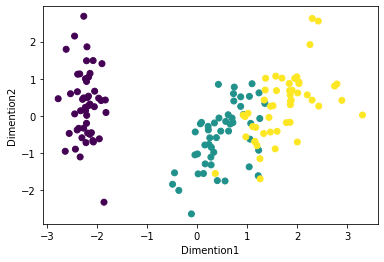

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
transformed = pca.fit_transform(X_std)

dimention1 = transformed[:,0]
dimention2 = transformed[:,1]
plt.scatter(dimention1, dimention2, c=y)
plt.xlabel('Dimention1')
plt.ylabel('Dimention2')

plt.show()

## SVD

sklearn의 PCA와 SVD 방식으로 구성된 라이브러리를 비교했을 때 서로 같은 값을 가진다는 것을 알 수 있다.

이로써 sklearn의 PCA가 SVD 방식으로 구현되었다는 것을 알 수 있다.

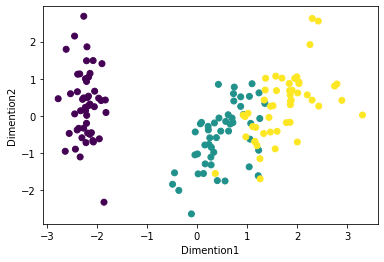

In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components = 2)
transformed = tsvd.fit_transform(X_std)

dimention1 = transformed[:,0]
dimention2 = transformed[:,1]
plt.scatter(dimention1, dimention2, c=y)
plt.xlabel('Dimention1')
plt.ylabel('Dimention2')

plt.show()

## LDA

선형판별분석은 사실 분류 알고리즘으로 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 기준으로 학습을 한다. 이 알고리즘의 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 SVM과 같은 최대마진을 통한 분류 알고리즘을 사용하기전에 활용한다면 모델의 성능을 더 높일 수 있다.

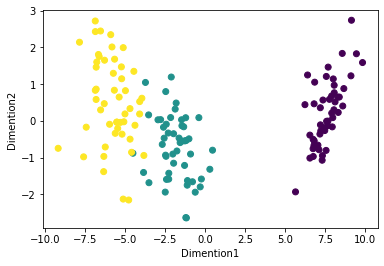

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
transformed = lda.fit_transform(X_std, y)

dimention1 = transformed[:,0]
dimention2 = transformed[:,1]
plt.scatter(dimention1, dimention2, c=y)
plt.xlabel('Dimention1')
plt.ylabel('Dimention2')

plt.show()

## T-SNE

T-SNE는 비슷한 샘프은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소한다. 주로 시각화에 많이 사용되며 특히 고차원 고안에 있는 샘플의 군집을 시각화 할때 사용된다.

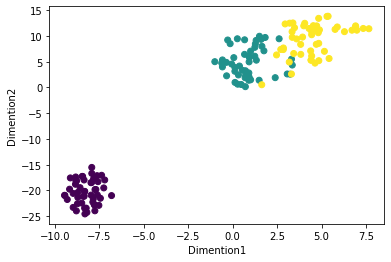

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=10.0, random_state= 22) #10.0~1000.0
transformed = tsne.fit_transform(X_std)

dimention1 = transformed[:,0]
dimention2 = transformed[:,1]
plt.scatter(dimention1, dimention2, c=y)
plt.xlabel('Dimention1')
plt.ylabel('Dimention2')

plt.show()

# 차원 축소 실습

0 ~ 9 까지의 손글씨 데이터로 이루어진 MNIST 데이터를 가지고 차원축소 실습을 진행하겠다.

11493376/11490434 [==============================] - 0s 0us/step


<Figure size 432x288 with 0 Axes>

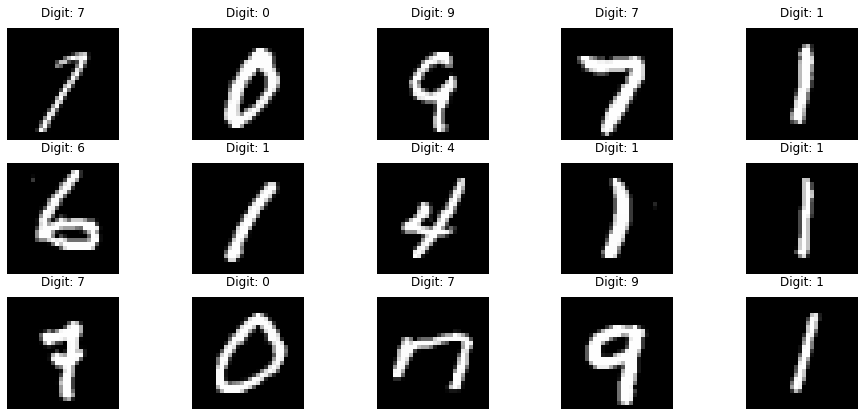

In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# data를 각 픽셀에 이름붙여 표현
feat_cols = ['pixel'+str(i) for i in range(X_train.shape[1])]
df = pd.DataFrame(X_train, columns=feat_cols)
df['y'] = y_train

# 무작위로 섞음
np.random.seed(22) # 재현 가능성을 위한 시드 고정
rndperm = np.random.permutation(df.shape[0])

# 15개의 데이터만 시각화 함
plt.gray()
fig = plt.figure(figsize=(16, 7))
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    ax.axis('off')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

차원 축소의 경우 분산이 큰 쪽으로 차원을 축소하는 경향이 존재하기 하기 때문에 분산을 1로 통일시켜줘 데이터의 왜곡을 제거해 주었다.



In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'Hwo to best PCA components')

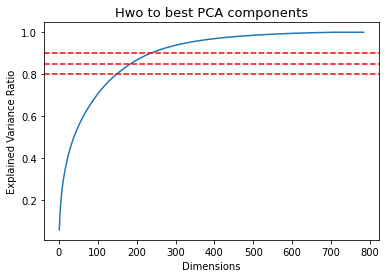

In [ ]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.9, linestyle='--', color='r')
plt.axhline(0.85, linestyle='--', color='r')
plt.axhline(0.8, linestyle='--', color='r')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Hwo to best PCA components', fontsize=13)

축소된 차원의 개수에 따른 설명력을 그래프로 나타낸 결과 기울기가 급하게 바뀌는 0.85 정도의 설명력을 가지는 것이 합당하다고 판단했다.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(f'PCA에서 0.85의 설명력을 가지는 주성분의 개수: {len(pca.explained_variance_ratio_)}')

PCA에서 0.85의 설명력을 가지는 주성분의 개수: 185


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Text(0.5, 1.0, 'Hwo to best LDA components')

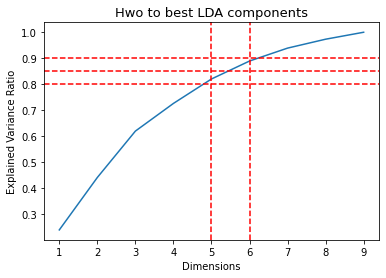

In [ ]:
plt.plot(range(1, len(lda.explained_variance_ratio_) + 1), np.cumsum(lda.explained_variance_ratio_))
plt.axhline(0.9, linestyle='--', color='r')
plt.axhline(0.85, linestyle='--', color='r')
plt.axhline(0.8, linestyle='--', color='r')
plt.axvline(5, linestyle='--', color='r')
plt.axvline(6, linestyle='--', color='r')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Hwo to best LDA components', fontsize=13)

축소된 차원의 개수에 따른 설명력을 그래프로 나타낸 결과 그래프의 기울기 급하게 바뀌는 특정한 지점을 찾을 수 없어서 기본적인 차원 축소의 기준인 0.8 정도의 설명력을 가지는 것이 가장 합당하다고 판단했다.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
print(f'LDA에서 0.8의 설명력을 가지는 주성분의 개수: {len(lda.explained_variance_ratio_)}')

LDA에서 0.8의 설명력을 가지는 주성분의 개수: 5


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

rf = RandomForestClassifier(random_state=22)
rf_pca = RandomForestClassifier(random_state=22)
rf_lda = RandomForestClassifier(random_state=22)

start = time.time()
rf.fit(X_train, y_train)
end = time.time()
print(f"원본 데이터 훈련 시간: {end - start}")

start = time.time()
rf_pca.fit(X_train_pca, y_train)
end = time.time()
print(f"PCA 데이터 훈련 시간 : {end - start}")

start = time.time()
rf_lda.fit(X_train_lda, y_train)
end = time.time()
print(f"LDA 데이터 훈련 시간 : {end - start}")

rf_train = rf.predict(X_train)
rf_pca_train = rf_pca.predict(X_train_pca)
rf_lda_train = rf_lda.predict(X_train_lda)

rf_test = rf.predict(X_test)
rf_pca_test = rf_pca.predict(X_test_pca)
rf_lda_test = rf_lda.predict(X_test_lda)

원본 데이터 훈련 시간: 35.683348178863525
PCA 데이터 훈련 시간 : 103.25394344329834
LDA 데이터 훈련 시간 : 16.3083279132843


In [ ]:
from sklearn.metrics import accuracy_score

print('Train-Set')
print("원본데이터 :{} ".format( accuracy_score(rf_train, y_train) ))
print("PCA        :{} ".format( accuracy_score(rf_pca_train, y_train) ))
print("LDA        :{} ".format( accuracy_score(rf_lda_train, y_train) ))

print()

print('Test-Set')
print("원본데이터 :{} ".format( accuracy_score(rf_test, y_test) ))
print("PCA        :{} ".format( accuracy_score(rf_pca_test, y_test) ))
print("LDA        :{} ".format( accuracy_score(rf_lda_test, y_test) ))

Train-Set
원본데이터 :1.0 
PCA        :1.0 
LDA        :0.9999833333333333 

Test-Set
원본데이터 :0.9693 
PCA        :0.9419 
LDA        :0.8439 


# LGBM

In [ ]:
import lightgbm as LGBM
import time

lgbm = LGBM.LGBMClassifier(random_state=22, 
                           tree_method='gpu_hist', 
                           predictor='gpu_predictor')

lgbm_pca = LGBM.LGBMClassifier(random_state=22, 
                           tree_method='gpu_hist', 
                           predictor='gpu_predictor')

lgbm_lda = LGBM.LGBMClassifier(random_state=22, 
                           tree_method='gpu_hist', 
                           predictor='gpu_predictor')

start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print(f"원본 데이터 훈련 시간: {end - start}")

start = time.time()
lgbm_pca.fit(X_train_pca, y_train)
end = time.time()
print(f"PCA 데이터 훈련 시간 : {end - start}")

start = time.time()
lgbm_lda.fit(X_train_lda, y_train)
end = time.time()
print(f"LDA 데이터 훈련 시간 : {end - start}")

lgbm_train = lgbm.predict(X_train)
lgbm_pca_train = lgbm_pca.predict(X_train_pca)
lgbm_lda_train = lgbm_lda.predict(X_train_lda)

lgbm_test = lgbm.predict(X_test)
lgbm_pca_test = lgbm_pca.predict(X_test_pca)
lgbm_lda_test = lgbm_lda.predict(X_test_lda)

원본 데이터 훈련 시간: 249.38881015777588
PCA 데이터 훈련 시간 : 82.52537202835083
LDA 데이터 훈련 시간 : 4.08958101272583


In [ ]:
from sklearn.metrics import accuracy_score

print('Train-Set')
print("원본데이터 :{} ".format( accuracy_score(lgbm_train, y_train) ))
print("PCA        :{} ".format( accuracy_score(lgbm_pca_train, y_train) ))
print("LDA        :{} ".format( accuracy_score(lgbm_lda_train, y_train) ))

print()

print('Test-Set')
print("원본데이터 :{} ".format( accuracy_score(lgbm_test, y_test) ))
print("PCA        :{} ".format( accuracy_score(lgbm_pca_test, y_test) ))
print("LDA        :{} ".format( accuracy_score(lgbm_lda_test, y_test) ))

Train-Set
원본데이터 :0.9979166666666667 
PCA        :0.99045 
LDA        :0.8779 

Test-Set
원본데이터 :0.9728 
PCA        :0.9486 
LDA        :0.8448 


# XGBoost

In [ ]:
import xgboost as XGB

xgb = XGB.XGBClassifier(random_state=22, 
                        tree_method='gpu_hist', 
                        predictor='gpu_predictor')

xgb_pca = XGB.XGBClassifier(random_state=22, 
                        tree_method='gpu_hist', 
                        predictor='gpu_predictor')

xgb_lda = XGB.XGBClassifier(random_state=22, 
                        tree_method='gpu_hist', 
                        predictor='gpu_predictor')

start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
print(f"원본 데이터 훈련 시간: {end - start}")

start = time.time()
xgb_pca.fit(X_train_pca, y_train)
end = time.time()
print(f"PCA 데이터 훈련 시간 : {end - start}")

start = time.time()
xgb_lda.fit(X_train_lda, y_train)
end = time.time()
print(f"LDA 데이터 훈련 시간 : {end - start}")

xgb_train = xgb.predict(X_train)
xgb_pca_train = xgb_pca.predict(X_train_pca)
xgb_lda_train = xgb_lda.predict(X_train_lda)

xgb_test = xgb.predict(X_test)
xgb_pca_test = xgb_pca.predict(X_test_pca)
xgb_lda_test = xgb_lda.predict(X_test_lda)

원본 데이터 훈련 시간: 15.974058628082275
PCA 데이터 훈련 시간 : 7.188766717910767
LDA 데이터 훈련 시간 : 3.9821627140045166


In [ ]:
from sklearn.metrics import accuracy_score

print('Train-Set')
print("원본데이터 :{} ".format( accuracy_score(xgb_train, y_train) ))
print("PCA        :{} ".format( accuracy_score(xgb_pca_train, y_train) ))
print("LDA        :{} ".format( accuracy_score(xgb_lda_train, y_train) ))

print()

print('Test-Set')
print("원본데이터 :{} ".format( accuracy_score(xgb_test, y_test) ))
print("PCA        :{} ".format( accuracy_score(xgb_pca_test, y_test) ))
print("LDA        :{} ".format( accuracy_score(xgb_lda_test, y_test) ))

Train-Set
원본데이터 :0.9438 
PCA        :0.9236333333333333 
LDA        :0.8477666666666667 

Test-Set
원본데이터 :0.9366 
PCA        :0.9133 
LDA        :0.8387 


실제 차원을 축소한 후 대부분 모델의 속도가 상당히 빨라진다는 것을 확인할 수 있으며, 축소된 차원의 수 만큼 데이터가 설명력을 잃어 모델 자체의 성능은 하락한다는 것도 알 수 있다. 그럼에도 모델의 속도가 많이 높아졌기 때문에 피드백시에는 그 효과가 더 높아질 것이다.

이처럼 차원축소 기법은 분석자의 상황 및 데이터의 종류에 따라서 알맞게 시행되어야 할 것이다.

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- https://excelsior-cjh.tistory.com/167
- https://darkpgmr.tistory.com/106